In [1]:
#Created by Chris Chen, Tinh Cao, Shashank Parameswaran, Zainab Hasnain, Sohaib Syed, From IIT
#For debug please contact chriserdou123@gmail.com
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [2]:
#In target's source field input the location of the data you want to predict
#In df1 to df4's source field input the location of the previous 4 years. If 2022 is target year, then input 2017-2021
#Header, InstDates for respective files
#target1stDate for target year 1st installment due date
#targetYear format for the year of the target dataset

#The location formats and targetYear variable should be close to the ones listed below

target = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2021.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)

df1 = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2017.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)
df2 = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2018.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)
df3 = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2019.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)
df4 = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/2020.rpt',sep='|',header=None,dtype = {1: str, 8: str, 15: str, 40: str, 41: str, 53: str, 54:str},error_bad_lines=False)

header = pd.read_csv('/Users/harrisonchen/Desktop/CCTO Property/Header.rpt', sep='|', header=None)
instDates = pd.read_csv("/Users/harrisonchen/Desktop/CCTO Property/InstDates.csv")

targetYear = 2021

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
Skipping line 1528882: expected 81 fields, saw 83

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (9,21,25,31,44,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
head = header.iloc[0].to_list()
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
target = target.dropna()

df1.columns = head
df2.columns = head
df3.columns = head
df4.columns = head
target.columns = head

In [4]:
df1 = df1[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]
df2 = df2[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]
df3 = df3[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]
df4 = df4[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]
target = target[['PIN','TaxStatus','HomeownerExempt', 'SeniorExempt','SeniorFreezeExempt', 'LongtimeHomeownersExempt',
            'TaxType', 'BillYear', 'BillType','AdjustedAmountDue1','TaxAmountDue1','InterestAmountDue1','CostAmountDue1',
            'TotalAmountDue1','LastPaymentDate1','LastPaymentSource1','OriginalTaxDue2','AdjustedTaxDue2','TaxAmountDue2',
            'InterestAmountDue2','CostAmountDue2','TotalAmountDue2','LastPaymentDate2','LastPaymentSource2','CofENumber',
            'PastTaxSaleStatus','EqualizedEvaluation','AssessedValuation','TaxRate','CondemnationStatus', 'MunicipalAcquisitionStatus',
            'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus','RefundStatus', 'LastPaymentReceivedAmount1',
            'LastPaymentReceivedAmount2','HomeownerExemptAmount', 'SeniorExemptAmount','SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
            'VeteranExempt','TaxDueEstimated1']]

tail1 = instDates.tail(1)['Year'].values[0] - targetYear + 5
dates = instDates.tail(tail1)

df1['PmtDue1'] = dates['Inst1'].iloc[0]
df2['PmtDue1'] = dates['Inst1'].iloc[1]
df3['PmtDue1'] = dates['Inst1'].iloc[2]
df4['PmtDue1'] = dates['Inst1'].iloc[3]
df1['PmtDue2'] = dates['Inst2'].iloc[0]
df2['PmtDue2'] = dates['Inst2'].iloc[1]
df3['PmtDue2'] = dates['Inst2'].iloc[2]
df4['PmtDue2'] = dates['Inst2'].iloc[3]
target['PmtDue1'] = dates['Inst1'].iloc[4]

y5 = pd.concat([df1,df2,df3,df4])
len(y5)


7461906

In [5]:
y5['Location']= y5['PIN'].str[0:2]
target['Location']= target['PIN'].str[0:2]
y5 = y5[y5['TaxStatus']!=1]
target = target[target['TaxStatus']!=1]
len(y5)

7095242

In [6]:
y5 = y5[(y5['AdjustedAmountDue1']!=0) | (y5['AdjustedTaxDue2']!=0)]
target = target[(target['AdjustedAmountDue1']!=0) | (target['AdjustedTaxDue2']!=0)]
len(y5)

6914851

In [7]:
df1=1
df2=1
df3=1
df4=1

y5 = y5[(y5['LastPaymentSource2'] != '600') &(y5['LastPaymentSource2'] != '527') & (y5['LastPaymentSource2'] != '800') &
       (y5['LastPaymentSource2'] != '802') & (y5['LastPaymentSource2'] != '830')]
target = target[(target['LastPaymentSource2'] != '600') &(target['LastPaymentSource2'] != '527') & (target['LastPaymentSource2'] != '800') &
       (target['LastPaymentSource2'] != '802') & (target['LastPaymentSource2'] != '830')]
len(y5)

3846223

In [8]:
y5 = y5[(y5['LastPaymentSource1'] != '600') &(y5['LastPaymentSource1'] != '527') & (y5['LastPaymentSource1'] != '800') &
       (y5['LastPaymentSource1'] != '802') & (y5['LastPaymentSource1'] != '830')]
target = target[(target['LastPaymentSource1'] != '600') &(target['LastPaymentSource1'] != '527') & (target['LastPaymentSource1'] != '800') &
       (target['LastPaymentSource1'] != '802') & (target['LastPaymentSource1'] != '830')]
len(y5)

3701926

In [9]:
y5 = y5[y5['LastPaymentDate1']!='00000000']
y5 = y5[y5['LastPaymentDate2']!='00000000']
target = target[target['LastPaymentDate1']!='00000000']


y5['LastPaymentDate1'] = pd.to_datetime(y5['LastPaymentDate1'], format='%m%d%Y')
y5['LastPaymentDate2'] = pd.to_datetime(y5['LastPaymentDate2'], format='%m%d%Y')
target['LastPaymentDate1'] = pd.to_datetime(target['LastPaymentDate1'], format='%m%d%Y')


y5['PmtDue1'] = pd.to_datetime(y5['PmtDue1'], format='%Y-%m-%d')
y5['PmtDue2'] = pd.to_datetime(y5['PmtDue2'], format='%Y-%m-%d')
target['PmtDue1'] = pd.to_datetime(target['PmtDue1'], format='%Y-%m-%d')


y5['DiffPmt1'] = (y5['LastPaymentDate1'] - y5['PmtDue1']).dt.days
y5['DiffPmt2'] = (y5['LastPaymentDate2'] - y5['PmtDue2']).dt.days
target['DiffPmt1'] = (target['LastPaymentDate1'] - target['PmtDue1']).dt.days


In [10]:
y5['BillType'] = y5['BillType'].astype(str)
y5['CofENumber'] = y5['CofENumber'].astype(str)
target['BillType'] = target['BillType'].astype(str)
target['CofENumber'] = target['CofENumber'].astype(str)

y5 = y5.drop('SeniorFreezeExempt',axis=1)
target = target.drop('SeniorFreezeExempt',axis=1)

y5['AdjustedAmountDue1'] = y5['AdjustedAmountDue1'].astype(float)
y5['AdjustedTaxDue2'] = y5['AdjustedTaxDue2'].astype(float)
y5['PastTaxSaleStatus'] = y5['PastTaxSaleStatus'].map({'Y': 1, 'N': 0})
y5['LastPaymentReceivedAmount1'] = y5['LastPaymentReceivedAmount1'].astype(float)
target['AdjustedAmountDue1'] = target['AdjustedAmountDue1'].astype(float)
target['AdjustedTaxDue2'] = target['AdjustedTaxDue2'].astype(float)
target['PastTaxSaleStatus'] = target['PastTaxSaleStatus'].map({'Y': 1, 'N': 0})
target['LastPaymentReceivedAmount1'] = target['LastPaymentReceivedAmount1'].astype(float)

y5["CofENumber"] = y5['CofENumber'].astype(float)
y5.loc[y5["CofENumber"] == 0, "CofENumber"] = 0
y5.loc[y5["CofENumber"] != 0, "CofENumber"] = 1
y5["CofENumber"] = y5['CofENumber'].astype(int)
target["CofENumber"] = target['CofENumber'].astype(float)
target.loc[target["CofENumber"] == 0, "CofENumber"] = 0
target.loc[target["CofENumber"] != 0, "CofENumber"] = 1
target["CofENumber"] = target['CofENumber'].astype(int)

y5.loc[y5["HomeownerExempt"] > 0, "HomeownerExempt"] = 1
y5.loc[y5["SeniorExempt"] > 0, "SeniorExempt"] = 1
y5.loc[y5["LongtimeHomeownersExempt"] > 0, "LongtimeHomeownersExempt"] = 1
y5 = y5.drop(['LastPaymentDate1','LastPaymentDate2','PmtDue1','PmtDue2'],axis=1)
y5.loc[y5["ExemptStatus"] > 0, "ExemptStatus"] = 1
y5.loc[y5["VeteranExempt"] > 0, "VeteranExempt"] = 1
target.loc[target["HomeownerExempt"] > 0, "HomeownerExempt"] = 1
target.loc[target["SeniorExempt"] > 0, "SeniorExempt"] = 1
target.loc[target["LongtimeHomeownersExempt"] > 0, "LongtimeHomeownersExempt"] = 1
target = target.drop(['LastPaymentDate1','LastPaymentDate2','PmtDue1'],axis=1)
target.loc[target["ExemptStatus"] > 0, "ExemptStatus"] = 1
target.loc[target["VeteranExempt"] > 0, "VeteranExempt"] = 1

y5 = y5.drop(['EqualizedEvaluation','TaxAmountDue1','TaxAmountDue2','OriginalTaxDue2'],axis=1)
y5 = y5.astype({"SeniorExempt":'int',"LongtimeHomeownersExempt":'int',"BillYear":'int',"CondemnationStatus":'int',
               "MunicipalAcquisitionStatus":'int',"AcquisitionStatus":'int',"ExemptStatus":'int',"BankruptStatus":'int',
               "VeteranExempt":'int'}) 
target = target.drop(['EqualizedEvaluation','TaxAmountDue1','TaxAmountDue2','OriginalTaxDue2'],axis=1)
target = target.astype({"SeniorExempt":'int',"LongtimeHomeownersExempt":'int',"BillYear":'int',"CondemnationStatus":'int',
               "MunicipalAcquisitionStatus":'int',"AcquisitionStatus":'int',"ExemptStatus":'int',"BankruptStatus":'int',
               "VeteranExempt":'int'}) 

In [11]:
yr5 = y5[y5['DiffPmt2'] > 0]
yr5 = yr5[yr5['DiffPmt2'] < 500]
len(yr5)

674477

In [12]:
yr5 = yr5[yr5['DiffPmt1'] > 0]
yr5 = yr5[yr5['DiffPmt1'] < 680]
target = target[target['DiffPmt1'] > 0]
target = target[target['DiffPmt1'] < 680]
len(yr5)

366836

In [13]:
yr5 = yr5.drop(['LastPaymentSource2','LastPaymentReceivedAmount2'], axis=1)
yr5 = yr5.drop('PIN',axis=1)
target = target.drop(['LastPaymentSource2','LastPaymentReceivedAmount2'], axis=1)
target1 = target.drop('PIN', axis=1)
yr5.columns.values

array(['TaxStatus', 'HomeownerExempt', 'SeniorExempt',
       'LongtimeHomeownersExempt', 'TaxType', 'BillYear', 'BillType',
       'AdjustedAmountDue1', 'InterestAmountDue1', 'CostAmountDue1',
       'TotalAmountDue1', 'LastPaymentSource1', 'AdjustedTaxDue2',
       'InterestAmountDue2', 'CostAmountDue2', 'TotalAmountDue2',
       'CofENumber', 'PastTaxSaleStatus', 'AssessedValuation', 'TaxRate',
       'CondemnationStatus', 'MunicipalAcquisitionStatus',
       'AcquisitionStatus', 'ExemptStatus', 'BankruptStatus',
       'RefundStatus', 'LastPaymentReceivedAmount1',
       'HomeownerExemptAmount', 'SeniorExemptAmount',
       'SeniorFreezeExemptAmount', 'LongtimeHomeownersExemptAmount',
       'VeteranExempt', 'TaxDueEstimated1', 'Location', 'DiffPmt1',
       'DiffPmt2'], dtype=object)

In [14]:
yr5['BillYear'] = yr5['BillYear']-2017
yr5.loc[yr5["BillYear"] < 0, "BillYear"] = 0

target1['BillYear'] = target1['BillYear']-2017
target1.loc[target1["BillYear"] < 0, "BillYear"] = 0

print(yr5.shape)
print(target1.shape)

(366836, 36)
(157765, 35)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(yr5.drop(['DiffPmt2'],axis=1), yr5['DiffPmt2'],
                                                    test_size=0.2, random_state=42,stratify=yr5['DiffPmt2'])

In [16]:
from sklearn.ensemble import RandomForestRegressor

st = time.time()
rfr = RandomForestRegressor(max_depth=26,n_estimators=200)
rfr.fit(X_train,y_train)
print(rfr)
print('train data r2: ', rfr.score(X_train,y_train))
print('test data r2: ', rfr.score(X_test,y_test))
et = time.time()
print('Execution time in Min: ', (et-st)/60)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=26,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
('train data r2: ', 0.8815304436496517)
('test data r2: ', 0.6626905733773512)
('Execution time in Min: ', 12.010742219289144)


Text(0.5,0,'Random Forest Feature Importance')

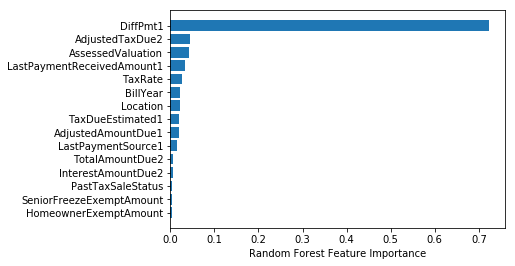

In [17]:
sorted_idx = rfr.feature_importances_.argsort()
imp = pd.DataFrame()
imp['col'] = yr5.drop(['DiffPmt2'],axis=1).columns[sorted_idx]
imp['imp'] = rfr.feature_importances_[sorted_idx]
imp = imp.sort_values('imp',ascending=False)
finalimp = imp.head(15).sort_values('imp',ascending=True)
plt.barh(finalimp['col'],finalimp['imp'])
plt.xlabel("Random Forest Feature Importance")

In [18]:
MAE = pd.DataFrame()
MAE['Pred'] = rfr.predict(X_test)
MAE['True'] = y_test.values
MAE['AE'] = abs(MAE['Pred']-MAE['True'])
MAE['APE'] = abs((MAE['True']-MAE['Pred'])/MAE['True'])
MAE['y_bar'] = sum(MAE['True'])/len(MAE)
MAE['SSR'] = MAE['AE']*MAE['AE']
MAE['TSS'] = (MAE['True']-MAE['y_bar']) * (MAE['True']-MAE['y_bar'])
MAE

,Pred,True,AE,APE,y_bar,SSR,TSS
0,84.239336,34,50.239336,1.477628,128,2523.990890,8836
1,103.456822,353,249.543178,0.706921,128,62271.797499,50625
2,85.661549,88,2.338451,0.026573,128,5.468352,1600
3,114.537010,212,97.462990,0.459731,128,9499.034388,7056
4,84.580413,35,49.580413,1.416583,128,2458.217358,8649
5,132.008722,118,14.008722,0.118718,128,196.244289,100
6,68.131757,46,22.131757,0.481125,128,489.814658,6724
7,92.474341,40,52.474341,1.311859,128,2753.556454,7744
8,159.916485,149,10.916485,0.073265,128,119.169635,441
9,25.995000,26,0.005000,0.000192,128,0.000025,10404


In [19]:
r2 = (1 - sum(MAE['SSR']) / sum(MAE['TSS']) )*100
r2 = "{:.2f}".format(r2)
print('r squared: ', r2 + '%')
print('R Squared indicates the percentage of total variance explained by the model')

('r squared: ', '66.27%')
R Squared indicates the percentage of total variance explained by the model


In [20]:
mae = sum(MAE['AE'])/len(y_test)
mae = "{:.2f}".format(mae)
print('MAE: ', mae)
print('The Mean Abosolute Error indicates on average how many days off are the predictions')

('MAE: ', '41.94')
The Mean Abosolute Error indicates on average how many days off are the predictions


In [21]:
mape = sum(MAE['APE'])/91860 * 100
mape = "{:.2f}".format(mape)
print('MAPE: ', mape+'%')
print('The Mean Abosolute Percentage Error indicates on average the percentage of days off')

('MAPE: ', '173.67%')
The Mean Abosolute Percentage Error indicates on average the percentage of days off


We want the graph to be a linear line from bottom left to top right
The furthur away from this diagnol, the worse the result is


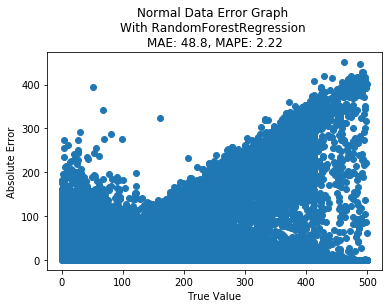

In [22]:
plt.scatter(MAE['True'],MAE['AE'])
plt.xlabel('True Value')
plt.ylabel('Absolute Error')
plt.title('Normal Data Error Graph \nWith RandomForestRegression \nMAE: 48.8, MAPE: 2.22')
print('We want the graph to be a linear line from bottom left to top right')
print('The furthur away from this diagnol, the worse the result is')

In [23]:
target['PredictionDaysLate'] = rfr.predict(target1)
result = target[['PIN','PredictionDaysLate']]
result.reset_index(inplace=True)
result.drop("index",axis=1,inplace=True)
result

/usr/local/lib/python2.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,PIN,PredictionDaysLate
0,08321010301031,201.847544
1,08321010301037,124.101811
2,08321010301064,64.486901
3,08321010331015,96.270833
4,08321010331018,63.592782
5,08321010331050,65.056398
6,07151000371070,41.006805
7,08321010351001,60.442668
8,08321010351016,125.649514
9,08321010301024,76.441672


In [24]:
"""#to locate a specific PIN, you can do:
result[result['PIN']=='Enter Pin Number Here']"""

"#to locate a specific PIN, you can do:\nresult[result['PIN']=='Enter Pin Number Here']"

In [25]:
"""#to load the final result with selected columns
colList = ['PIN', 'PredictionDaysLate', 'Enter Column Name', 'Enter Column Name']
result1 = target[colList]
result1.reset_index(inplace=True)
result1.drop("index",axis=1,inplace=True)
result1"""

'#to load the final result with selected columns\ncolList = [\'PIN\', \'PredictionDaysLate\', \'Enter Column Name\', \'Enter Column Name\']\nresult1 = target[colList]\nresult1.reset_index(inplace=True)\nresult1.drop("index",axis=1,inplace=True)\nresult1'

In [26]:
"""#to export a dataframe named result1 into a csv file 
result1.to_csv('file_name.csv', sep = '|')"""

"#to export a dataframe named result1 into a csv file \nresult1.to_csv('file_name.csv', sep = '|')"